<a href="https://colab.research.google.com/github/ldl917/first/blob/main/gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 在GPU环境下配置tensorflow 和 pytorch

In [8]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 24 kB/s 


In [9]:
import tensorflow as tf
print (tf.__version__)

2.7.0


In [10]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 查看服务器型号与详细参数。这里的服务器为特使拉的K80，算力为3.7

In [2]:
from tensorflow.python.client import device_lib
device_list = device_lib.list_local_devices()
print(device_list)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13995433882533226052
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11321147392
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3483431404002389635
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


安装gpu版的pytorch


In [3]:
!pip install torch


In [4]:
import torch
torch.cuda.is_available
#查看torch是否可用

<function torch.cuda.is_available>

In [5]:
#查看GPU数量、名称、指定GPU容量和内存使用情况
print(torch.cuda.device_count())
print(torch.cuda.get_device_name())
print(torch.cuda.get_device_capability())
!nvidia-smi

1
Tesla K80
(3, 7)
Tue Dec  7 01:36:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    76W / 149W |    600MiB / 11441MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                     

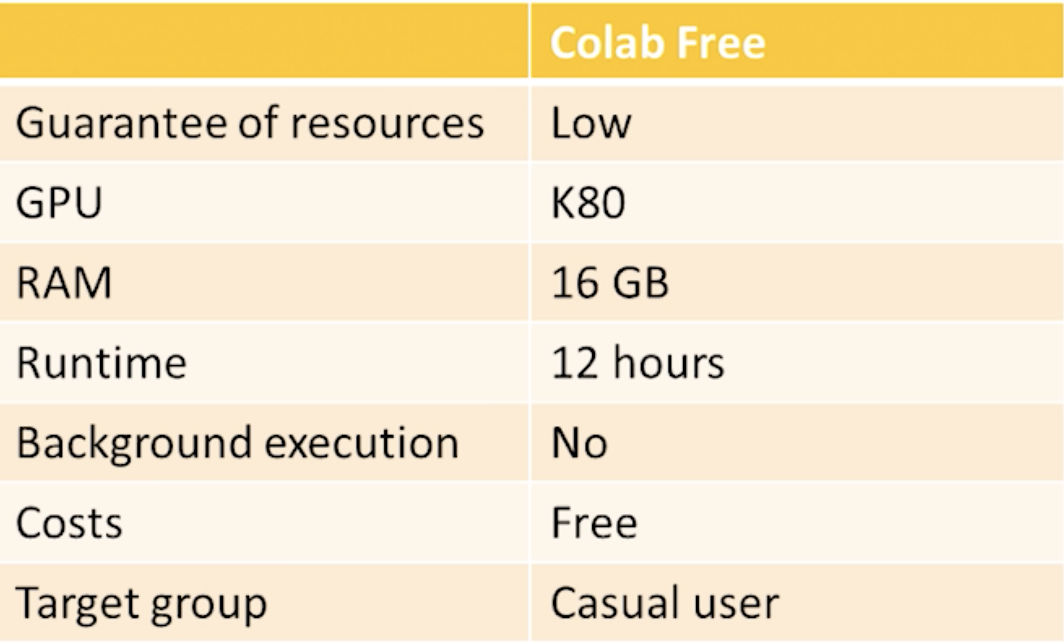

In [23]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/一维卷积/WISDM_ar_v1.1_raw.txt',error_bad_lines=False)
print(data.head(5))



b'Skipping line 134634: expected 6 fields, saw 11\nSkipping line 197687: expected 6 fields, saw 11\n'
b'Skipping line 273261: expected 6 fields, saw 11\nSkipping line 371932: expected 6 fields, saw 11\n'
b'Skipping line 711484: expected 6 fields, saw 11\n'
b'Skipping line 832903: expected 6 fields, saw 7\nSkipping line 832904: expected 6 fields, saw 7\nSkipping line 832905: expected 6 fields, saw 7\nSkipping line 832906: expected 6 fields, saw 7\nSkipping line 832907: expected 6 fields, saw 7\nSkipping line 832908: expected 6 fields, saw 7\nSkipping line 832909: expected 6 fields, saw 7\nSkipping line 832910: expected 6 fields, saw 7\nSkipping line 832911: expected 6 fields, saw 7\nSkipping line 832912: expected 6 fields, saw 7\nSkipping line 832913: expected 6 fields, saw 7\nSkipping line 832914: expected 6 fields, saw 7\nSkipping line 832915: expected 6 fields, saw 7\nSkipping line 832916: expected 6 fields, saw 7\nSkipping line 832917: expected 6 fields, saw 7\nSkipping line 832918:

   33  Jogging  49105962326000  -0.6946377  12.680544   0.50395286;
0  33  Jogging  49106062271000    5.012288  11.264028   0.95342433;
1  33  Jogging  49106112167000    4.903325  10.882658  -0.08172209;
2  33  Jogging  49106222305000   -0.612916  18.496431    3.0237172;
3  33  Jogging  49106332290000   -1.184970  12.108489     7.205164;
4  33  Jogging  49106442306000    1.375655  -2.492524    -6.510526;


In [7]:
print(data.head(0))
print(len(data))
print(data.loc[0:4])

Empty DataFrame
Columns: [33, Jogging, 49105962326000, -0.6946377, 12.680544, 0.50395286;]
Index: []
1086465
   33  Jogging  49105962326000  -0.6946377  12.680544   0.50395286;
0  33  Jogging  49106062271000    5.012288  11.264028   0.95342433;
1  33  Jogging  49106112167000    4.903325  10.882658  -0.08172209;
2  33  Jogging  49106222305000   -0.612916  18.496431    3.0237172;
3  33  Jogging  49106332290000   -1.184970  12.108489     7.205164;
4  33  Jogging  49106442306000    1.375655  -2.492524    -6.510526;


In [11]:
!pip install -q keras

In [20]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.30% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              #optimizer=keras.optimizers.Adadelta(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 8s 16ms/step - loss: 0.2428 - accuracy: 0.9252 - val_loss: 0.0516 - val_accuracy: 0.9840
Epoch 2/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0897 - accuracy: 0.9730 - val_loss: 0.0393 - val_accuracy: 0.9868
Epoch 3/12
469/469 [==============================] - 7s 15ms/step - loss: 0.0645 - accuracy: 0.9807 - val_loss: 0.0378 - val_accuracy: 0.9881
Epoch 4/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.0289 - val_accuracy: 0.9898
Epoch 5/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0458 - accuracy: 0.9850 - val_loss: 0.0288 - val_accuracy: 0.9899
Epoch 6/12
469/469 [==============================] - 7s 15ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0298 - val_accuracy: 0.9900
Epoch 7/12
469/469 [==============================] - 7s 16ms/step - 

In [21]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'